In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/MyDrive /mydrive
!ls /mydrive

'Colab Notebooks'   mush_workdir   ra   ultra_workdir
 mushroom_dataset   pet_work_dir   ta


In [ ]:
!mkdir /content/dataset
!cd /mydrive/Colab\ Notebooks/DACON/dacon-lettuce-generative; unzip open.zip -d /content/dataset
!ls -lia /content/dataset

Archive:  open.zip
  inflating: /content/dataset/sample_submission.zip  
   creating: /content/dataset/test_input/
  inflating: /content/dataset/test_input/TEST_01.csv  
  inflating: /content/dataset/test_input/TEST_02.csv  
  inflating: /content/dataset/test_input/TEST_03.csv  
  inflating: /content/dataset/test_input/TEST_04.csv  
  inflating: /content/dataset/test_input/TEST_05.csv  
   creating: /content/dataset/test_target/
  inflating: /content/dataset/test_target/TEST_01.csv  
  inflating: /content/dataset/test_target/TEST_02.csv  
  inflating: /content/dataset/test_target/TEST_03.csv  
  inflating: /content/dataset/test_target/TEST_04.csv  
  inflating: /content/dataset/test_target/TEST_05.csv  
   creating: /content/dataset/train_input/
  inflating: /content/dataset/train_input/CASE_01.csv  
  inflating: /content/dataset/train_input/CASE_02.csv  
  inflating: /content/dataset/train_input/CASE_03.csv  
  inflating: /content/dataset/train_input/CASE_04.csv  
  inflating: /conten

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,437 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and dire

In [ ]:
import pandas as pd
from glob import glob
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [ ]:
def make_dataset(input_list, target_list):
  df_all = pd.DataFrame()
  for i in range(len(input_list)):
    input_df = pd.read_csv(input_list[i])
    target_df = pd.read_csv(target_list[i])
    target_df['DAT'] = target_df['DAT'] - 1
    df = pd.merge(input_df, target_df, on='DAT', how='left')
    df['Case'] = i + 1
    df_all = pd.concat([df_all, df])
  return df_all


In [ ]:
def time_value(df):
  df['obs_time'] = pd.to_datetime(df['obs_time'])
  df['obs_time'] = df['obs_time'].dt.hour

  return df

### 환경 변수 별 제한 범위
output variable 인 predicted_weight_g 에는 제한 범위 없음

1. 시간당 내부 평균온도: 4도~40도
2. 시간당 내부 평균습도: 0% ~ 100%
3. 시간당 내부 평균 co2 농도 : 0ppm ~ 1200 ppm
4. 시간당 평균 EC : 0 ~ 8
5. 시간당 분무량 : 0 ~ 3000 / 일간 누적 분무량 0 ~ 72,000
6. 시간당 백색광량 : 0 ~ 120,000 / 일간 누적 백색광량 0 ~ 2,880,000
7. 시간당 적색광량 : 0 ~ 120,000 / 일간 누적 적색광량 0 ~ 2,880,000
8. 시간당 청색광량 : 0 ~ 120,000 / 일간 누적 청색광량 0 ~ 2,880,000
9. 시간당 총광량 : 0 ~ 120,000 / 일간 누적 총광량 0 ~ 2,880,000

In [ ]:
def limit_range(df):
  df.loc[(df['내부온도관측치'] < 4) | (df['내부온도관측치'] > 40), '내부온도관측치'] = np.nan
  df.loc[(df['내부습도관측치'] < 0) | (df['내부습도관측치'] > 100), '내부습도관측치'] = np.nan
  df.loc[(df['co2관측치'] < 0) | (df['co2관측치'] > 1200), 'co2관측치'] = np.nan
  df.loc[(df['ec관측치'] < 0) | (df['ec관측치'] > 8), 'ec관측치'] = np.nan
  df.loc[(df['시간당분무량'] < 0) | (df['시간당분무량'] > 3000), '시간당분무량'] = np.nan
  df.loc[(df['일간누적분무량'] < 0) | (df['일간누적분무량'] > 72000), '일간누적분무량'] = np.nan
  df.loc[(df['시간당백색광량'] < 0) | (df['시간당백색광량'] > 120000), '시간당백색광량'] = np.nan
  df.loc[(df['일간누적백색광량'] < 0) | (df['일간누적백색광량'] > 2880000), '일간누적백색광량'] = np.nan
  df.loc[(df['시간당적색광량'] < 0) | (df['시간당적색광량'] > 120000), '시간당적색광량'] = np.nan
  df.loc[(df['일간누적적색광량'] < 0) | (df['일간누적적색광량'] > 2880000), '일간누적적색광량'] = np.nan
  df.loc[(df['시간당청색광량'] < 0) | (df['시간당청색광량'] > 120000), '시간당청색광량'] = np.nan
  df.loc[(df['일간누적청색광량'] < 0) | (df['일간누적청색광량'] > 2880000), '일간누적청색광량'] = np.nan
  df.loc[(df['시간당총광량'] < 0) | (df['시간당총광량'] > 120000), '시간당총광량'] = np.nan
  df.loc[(df['일간누적총광량'] < 0) | (df['일간누적총광량'] > 2880000), '일간누적총광량'] = np.nan
  return df

In [ ]:
def col_cumsum(df, col, cum_col):
  df[cum_col] = 0
  for i in range(784):
    df[cum_col][i*24:(i+1)*24] = list(itertools.accumulate(df[col][i*24:(i+1)*24]))

  return df


In [ ]:
train_input_list = glob('/content/dataset/train_input/*.csv')
train_target_list = glob('/content/dataset/train_target/*.csv')
test_input_list = glob('/content/dataset/test_input/*.csv')
test_target_list = glob('/content/dataset/test_target/*.csv')

train = make_dataset(train_input_list, train_target_list)
test = make_dataset(test_input_list, test_target_list)

train = time_value(train)
test = time_value(test)

train = limit_range(train)
test = limit_range(test)

train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

train = col_cumsum(train, "시간당분무량", "일간누적분무량")
train = col_cumsum(train, "시간당백색광량", "일간누적백색광량")
train = col_cumsum(train, "시간당적색광량", "일간누적적색광량")
train = col_cumsum(train, "시간당청색광량", "일간누적청색광량")
train = col_cumsum(train, "시간당총광량", "일간누적총광량")


<ipython-input-5-9c1666fec9c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cum_col][i*24:(i+1)*24] = list(itertools.accumulate(df[col][i*24:(i+1)*24]))


In [ ]:
train.head(10)

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량,predicted_weight_g,Case
0,0,0,28.893333,57.695000,624.183333,1.065394,0.00,0.00,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.188795,1
1,0,1,28.869491,58.537288,626.203390,1.062776,769.00,769.00,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.188795,1
2,0,2,28.721667,58.161666,627.550000,1.066356,0.00,769.00,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.188795,1
3,0,3,28.716667,58.208333,631.033333,1.063944,769.00,1538.00,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.188795,1
4,0,4,28.665000,58.335000,628.950000,1.062918,0.00,1538.00,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.188795,1
5,0,5,28.778333,58.961667,622.766667,1.062341,0.00,1538.00,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.188795,1
6,0,6,29.138333,58.875000,626.766667,1.065124,769.00,2307.00,4112.0589,4112.0589,0.0,0.0,0.0,0.0,4112.0589,4112.0589,0.188795,1
7,0,7,30.596667,57.638333,624.600000,1.063252,769.00,3076.00,13230.3716,17342.4305,0.0,0.0,0.0,0.0,13230.3716,17342.4305,0.188795,1
8,0,8,31.960000,55.355000,621.216667,1.059891,0.00,3076.00,18242.8136,35585.2441,0.0,0.0,0.0,0.0,18242.8136,35585.2441,0.188795,1
9,0,9,31.255000,56.210000,619.066667,1.058108,756.14,3832.14,18255.1900,53840.4341,0.0,0.0,0.0,0.0,18255.1900,53840.4341,0.188795,1


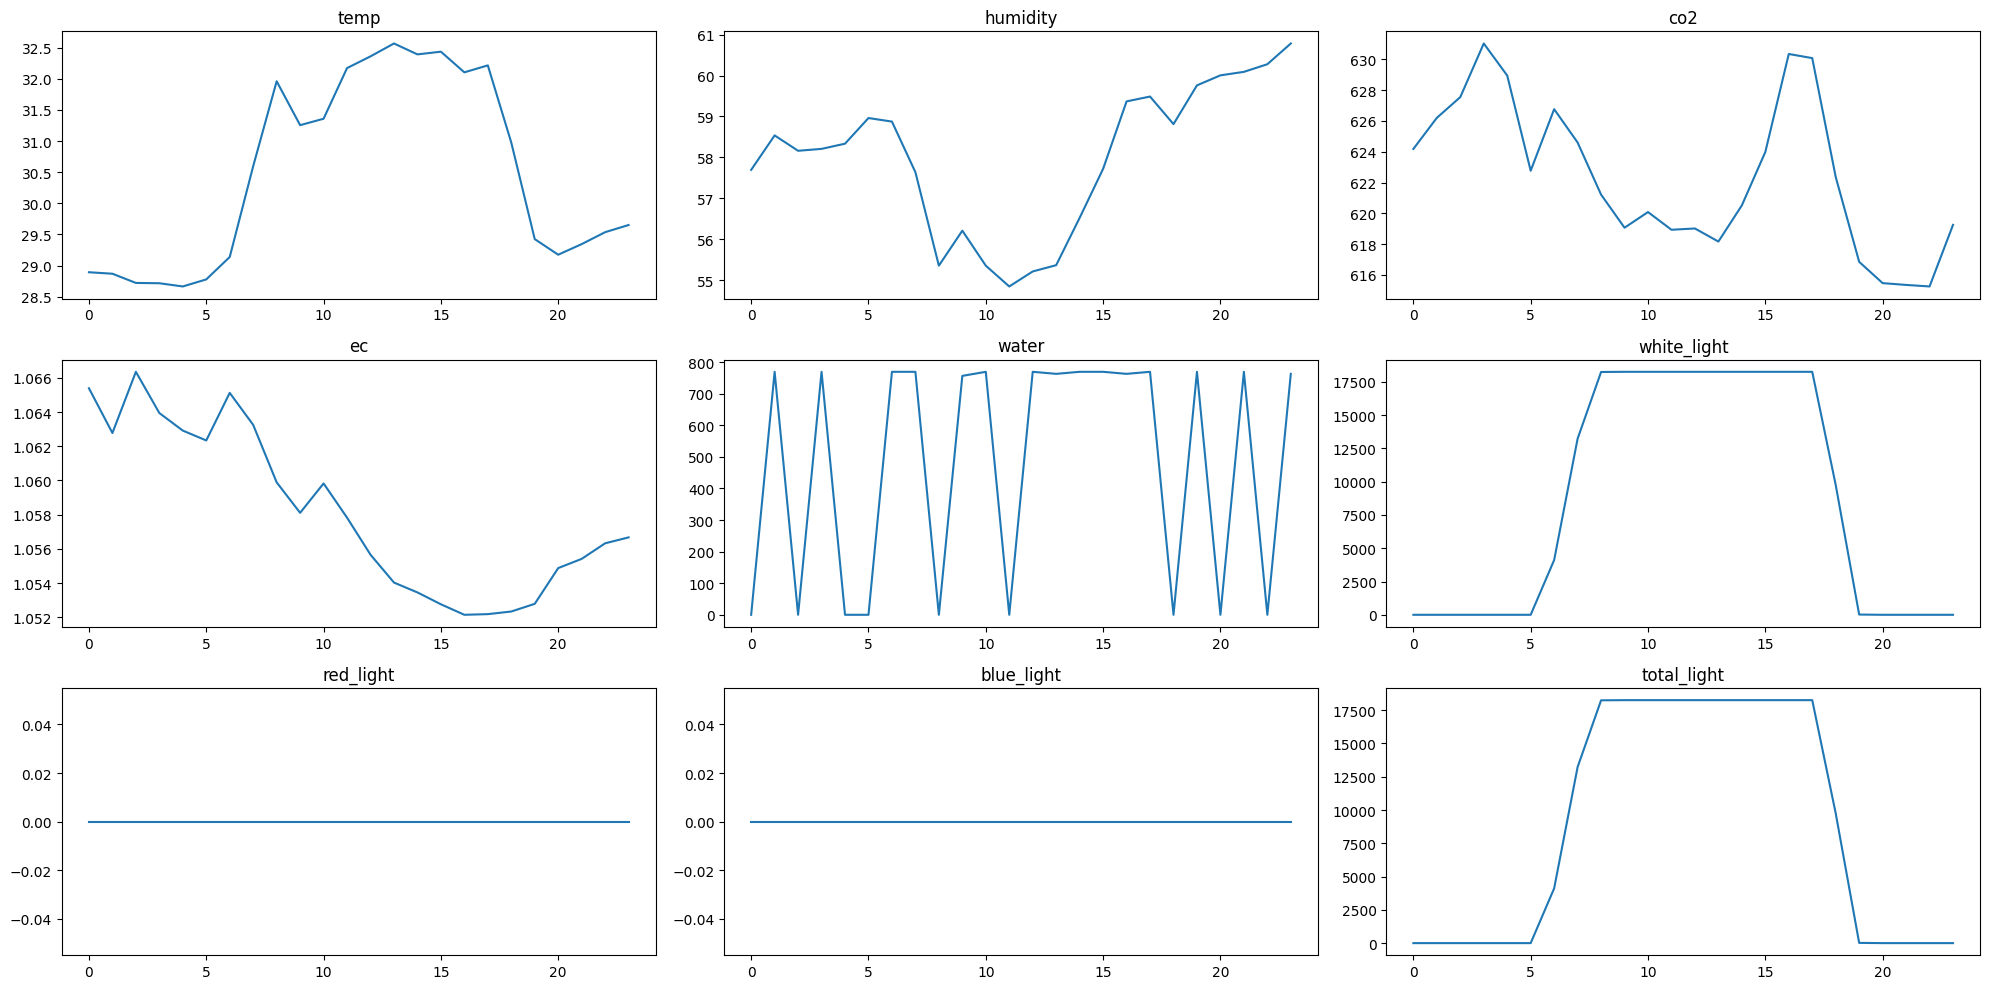

In [ ]:
col_names = ['내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량',
            '시간당백색광량', '시간당적색광량', '시간당청색광량', '시간당총광량']
title_names = ['temp', 'humidity', 'co2', 'ec', 'water', 'white_light', 'red_light', 'blue_light', 'total_light']
train_c1 = train[train['Case'] == 1]
train_c1d0 = train_c1[train_c1['DAT'] == 0]

%matplotlib inline
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
axs = axs.ravel(order='C')
for i, col in enumerate(col_names):
  axs[i].plot(train_c1d0[col].reset_index(drop=True))
  axs[i].set_title(title_names[i])
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


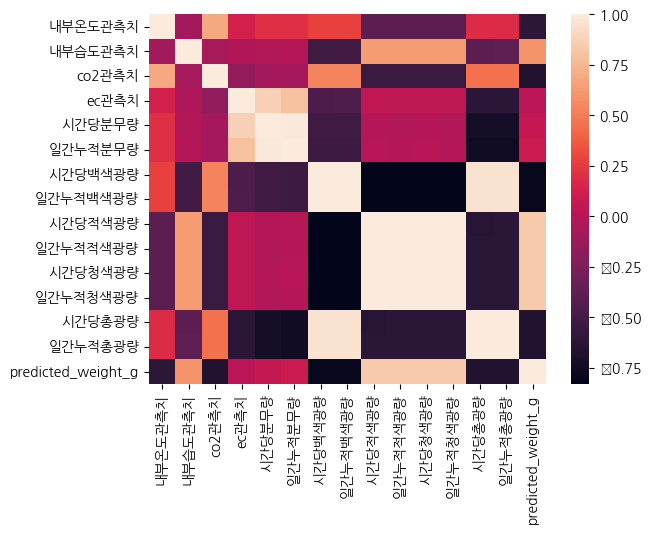

In [ ]:
import seaborn as sns

train_c1_mean = train_c1.groupby('DAT').mean()
df_corr = train_c1_mean.iloc[:, 1:-1].corr()

plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(df_corr)
plt.show()

In [ ]:
for col in train.columns:
  print(f'Col_name: {col} line plot')
  print('-'*87)
  fig, axs = plt.subplots(nrows=4, ncols=7, figsize=(21,20))
  axs = axs.ravel(order='C')
  for i, v in enumerate(train["Case"].unique()):
    axs[i].plot(train[col][train["Case"]==v].reset_index(drop=True))
    axs[i].set_title(f"Case_{v}")
  plt.tight_layout()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
train_scaled = StandardScaler().fit_transform(train.iloc[:, :-2])

In [ ]:
pca = PCA()
pca.fit(train_scaled)
train_pca = pca.transform(train_scaled)
train_pca = pd.DataFrame(train_pca)

In [ ]:
# eigenvector, pca matrix
print('\nEigenvector:\n', pca.components_)
print('\nProjected Data:\n', train_pca)

In [ ]:
#eigenvalue, ratio
print('\nEigenvalue:\n', pca.explained_variance_)
print('\nRatio:\n', pca.explained_variance_ratio_)

In [ ]:
# Scree plot
plt.title('Scree plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explaned Variance Ratio')
plt.plot(pca.explained_variance_ratio_, 'o-')